# CS 445 Final Project - Image Morphing

## Setup and Load Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import Delaunay

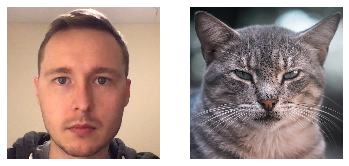

In [2]:
# Read in the source and target images
source_img = cv2.imread('./images/inputs/andrew.jpg')
target_img = cv2.imread('./images/inputs/cat.jpg')

assert source_img.shape == target_img.shape
H, W, C = source_img.shape

fix, axes = plt.subplots(1, 2)
[a.axis('off') for a in axes.ravel()]
axes[0].imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))

## Select Corresponding Points

In [3]:
'''
Display the image and collect points clicked on the image.

Heavily referenced from UIUC CS445 MP3 utils.py in starter code.
'''
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select corresponding points in the image')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    clicked = []
    
    def on_mouse_pressed(event):
        x = event.xdata
        y = event.ydata
        plt.plot(x, y, 'r+')
        clicked.append([x, y])
        
    fig.canvas.mpl_connect('button_press_event', on_mouse_pressed)
    
    return clicked

<IPython.core.display.Javascript object>


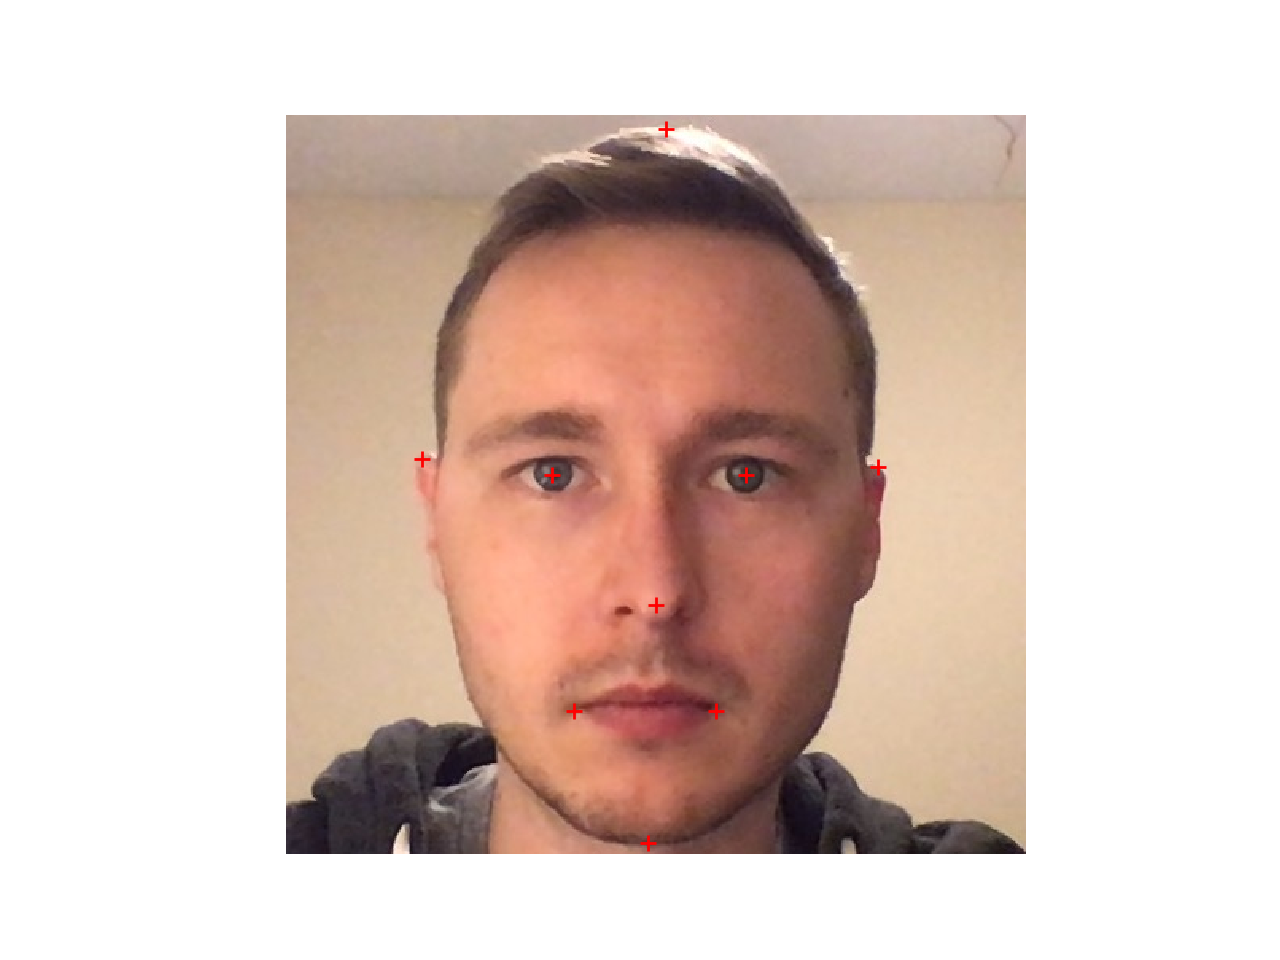

In [4]:
# Select corresponding points on the images
%matplotlib notebook
source_points = specify_points(source_img)

<IPython.core.display.Javascript object>


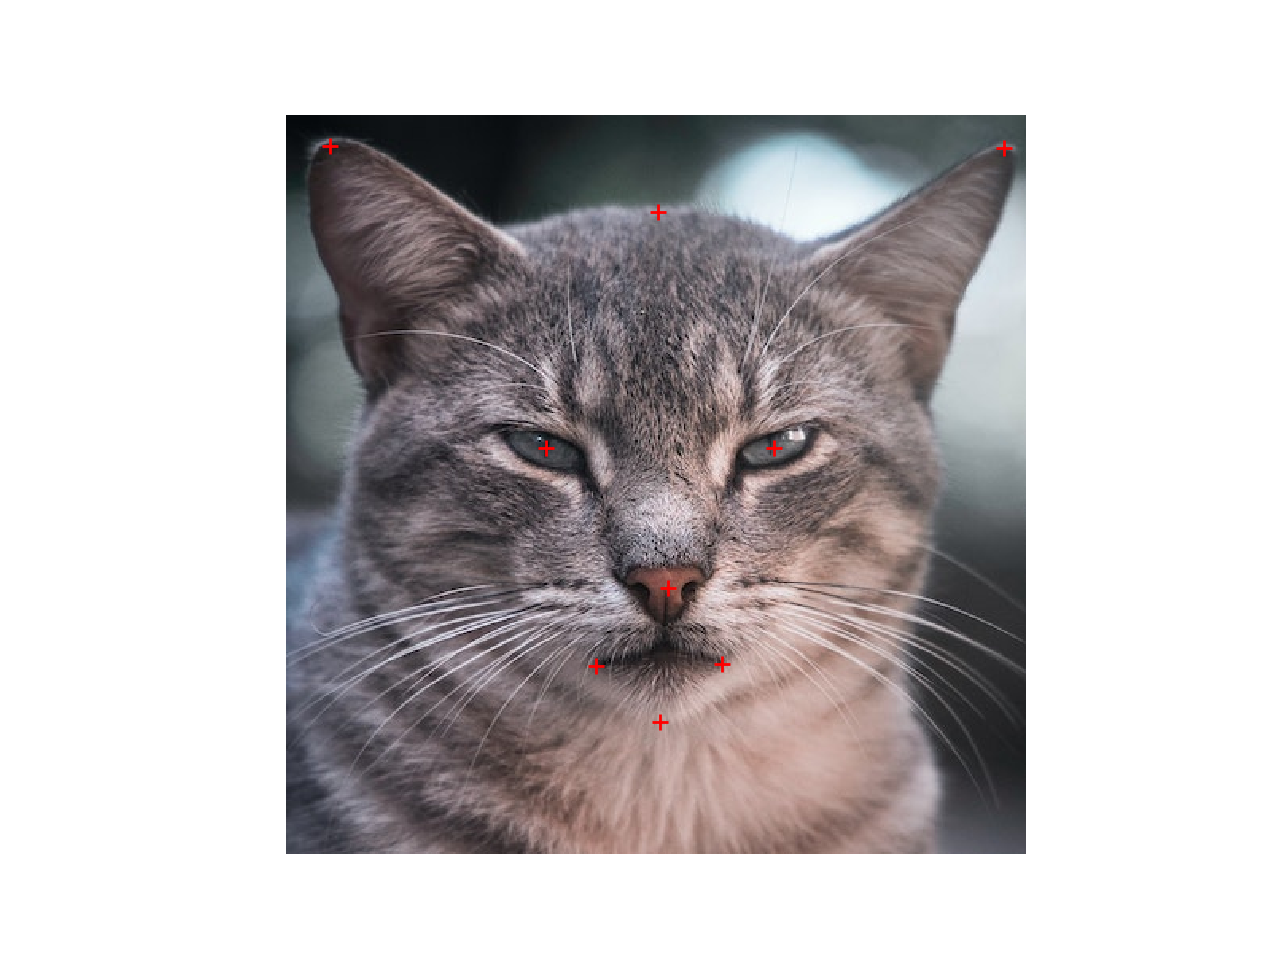

In [5]:
%matplotlib notebook
target_points = specify_points(target_img)

In [6]:
print(source_points)
print(target_points)

[[166.65655438311683, 225.61898843344153], [288.6938920454545, 225.61898843344153], [84.87895698051943, 215.55405336850652], [371.72960633116884, 220.58652090097405], [180.49584009740255, 374.07678064123377], [269.8221387987013, 374.07678064123377], [232.0786323051948, 307.396585836039], [238.3692167207792, 7.964767654220736], [227.04616477272725, 457.11249492694805]]
[[162.88220373376618, 208.79167512175326], [306.3075284090909, 208.79167512175326], [27.005580357142776, 18.81602577110391], [450.99096996753246, 20.074142654220793], [194.33512581168827, 345.9264153814935], [273.5964894480519, 344.66829849837666], [239.6273336038961, 296.85985693993507], [233.33674918831167, 60.33388291396102], [234.59486607142856, 381.15368810876623]]


In [7]:
# Add the points at the corners of the images
source_points.extend([[0, 0], [0, W-1], [H-1, 0], [H-1, W-1]])
target_points.extend([[0, 0], [0, W-1], [H-1, 0], [H-1, W-1]])
assert len(source_points) == len(target_points)

<IPython.core.display.Javascript object>


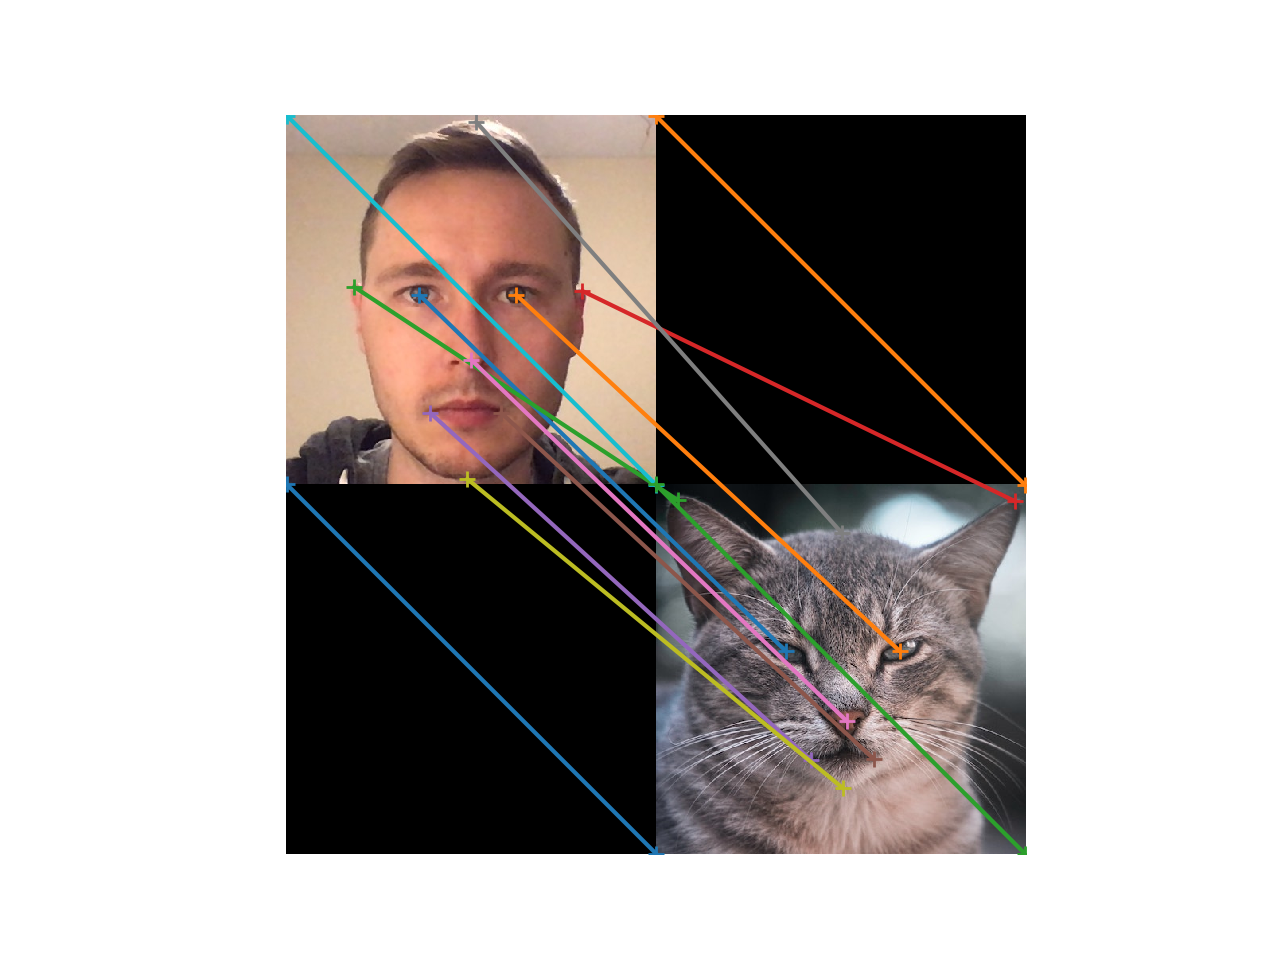

In [8]:
# Display the connected points to verify
mapping_img = np.zeros(shape=(2 * H, 2 * W, C), dtype='uint16')
for h in range(0, H):
    for w in range(0, W):
        for c in range(0, C):
            mapping_img[h][w][c] = source_img[h][w][c]
            mapping_img[h+H][w+W][c] = target_img[h][w][c]

fig = plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(mapping_img, cv2.COLOR_BGR2RGB))

for p in range(0, len(source_points)):
    x1 = source_points[p][0]
    y1 = source_points[p][1]
    x2 = target_points[p][0] + W
    y2 = target_points[p][1] + H
    plt.plot([x1, x2], [y1, y2], marker = '+')

## Compute Delaunay Triangulation

In [12]:
source_triangulation = Delaunay(source_points)
target_triangulation = Delaunay(target_points)

print(source_triangulation.simplices)

[[ 2 10  9]
 [11  7  9]
 [ 7  2  9]
 [ 8 12 10]
 [12  3 11]
 [ 3  7 11]
 [ 7  3  1]
 [ 2  4 10]
 [ 4  8 10]
 [ 3  5  1]
 [ 4  5  8]
 [ 8  5 12]
 [ 5  3 12]
 [ 0  4  2]
 [ 0  7  1]
 [ 7  0  2]
 [ 6  5  4]
 [ 0  6  4]
 [ 5  6  1]
 [ 6  0  1]]


In [10]:
def plot_triangulation(img, points, triangulation):
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.triplot(points[:,0], points[:,1], triangulation.simplices.copy())
    plt.plot(points[:,0], points[:,1], '+')

In [11]:
plot_triangulation(source_img, source_points, source_triangulation)
plot_triangulation(target_img, target_points, target_triangulation)

<IPython.core.display.Javascript object>

TypeError: list indices must be integers or slices, not tuple